# START NB

Ce nb est destiné à la découverte des données afin d'établir un stratégie de pre-processing qui soit adaptée.

In [19]:
# imports

# Base
import importlib
import functions
importlib.reload(functions)
from functions import *

# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [20]:
# Better visualization settings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [21]:
# Read the csvs

FOLDER_PATH = "data/"

TEST_PATH = FOLDER_PATH + "test.csv" 
TRAIN_PATH = FOLDER_PATH + "train.csv"
SAMPLE_PATH = FOLDER_PATH + "sample_submission.csv" 

df_test = pd.read_csv(TEST_PATH, engine='python', on_bad_lines='skip')
df_train = pd.read_csv(TRAIN_PATH, engine='python', on_bad_lines='skip')
df_sample = pd.read_csv(SAMPLE_PATH, engine='python', on_bad_lines='skip')

In [22]:
df_test.head(5)

Microsoft Edge  \
Firefox       Création d'un écran(infologic.core.accueil.Accu... Sélection d’un onglet    Sélection d’un onglet    Sélection d’un onglet    Sélection d’un onglet                              Sélection d'un flag                 Sélection d’un onglet                              Sélection d’un onglet Exécution d'un bouton                              Chainage                 Exécution d'un bouton(infologic.core.gui.contro... Chainage                            Exécution d'un bouton(infologic.core.accueil.Ac... Chainage                                           t5                                                 Sélection d'un flag      Lancement d'un tableau de bord      Filtrage / Tri(infologic.core.gui.controllers.B... t10                              Exécution d'un bouton<dispatch>                    Sélection d'un flag                 Exécution d'un bouton<dispatch>               Chainage                                     t15                      Double-clic<MT_AppelN1> Sélection d'un flag                                Lancement d'un tableau de bord                Lancement d'une action générique                   Chainage                         Création d'un écran(MAINT)    Sélection d'un flag                 Lancement d'un tableau de bord t20                        Exécution d'un bouton<DEF_03/24>$JCP$ Lancement d'une action générique Sélection d'un flag      Lancement d'une action générique t25                            Double-clic(infologic.core.gui.controllers.Blan... Création d'un écran(MAINT) Sélection d'un flag                                Création d'un écran(MAINT)                         Lancement d'une action générique t30                   Exécution d'un bouton<DEF_03/24>$JCP$ Sélection d'un flag                 Lancement d'un tableau de bord      Lancement d'une action générique Exécution d'un bouton$JCP$ t35                      Sélection d'un flag                                Lancement d'un tableau de bord                     Saisie dans un champ$JCP$ Exécution d'un bouton$JCP$                         Affichage d'une dialogue$JCP$                      Fermeture d'une dialogue$JCP$       Affichage d'une dialogue$JCP$ Exécution d'un bouton$JCP$ Affichage d'une dialogue$JCP$    Fermeture d'une dialogue$JCP$ Sélection d'un flag                                Lancement d'un tableau de bord                Fermeture d'une dialogue$JCP$                      Lancement d'une action générique                   Lancement d'une action générique t40                                 Exécution d'un bouton$JCP$                    Sélection d'un écran t45                                       Double-clic(infologic.core.gui.controllers.Blan... Lancement d'une action générique Création d'un écran(MAINT)    t50                                                Double-clic(infologic.core.gui.controllers.Blan... Lancement d'une action générique t55                        Saisie dans un champ(MAINT) t60                       Saisie dans un champ                               Exécution d'un bouton                   Sélection d'un flag                 Exécution d'un bouton                         Lancement d'une stat(infologic.core.gui.control... t65                                                Double-clic(MAINT)       Sélection d'un flag                 Lancement d'un tableau de bord                Lancement d'une action générique Création d'un écran              t70                                      Double-clic                                        Lancement d'une action générique Création d'un écran                                t75                   Double-clic                   Lancement d'une action générique Création d'un écran              t80                        Affichage d'une dialogue<DEF_03/24>$JCP$ t85                       Fermeture d'une dialogue$JCP$       t90                        Double-clic              Lancement d'une action générique Création d'un écran              Sélection d'un f

In [23]:
df_train.head(5)

,nuh,Firefox,Création d'un écran(infologic.core.accueil.AccueilController),Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue.1,Exécution d'un bouton.1,Fermeture d'une dialogue.1,Création d'un écran(infologic.core.gui.controllers.nested.InputFormNestedWindow),...,Lancement d'une stat(infologic.core.gui.controllers.nested.homeview.InputFormHomeView).84,t2905,Affichage d'un toast.308,t2905.1,Exécution d'un bouton(MAINT).15,Sélection d'un écran.12,Retour sur un écran(infologic.core.accueil.AccueilController).1,Affichage d'un toast.309,Filtrage / Tri.160,Fermeture de session
0,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,None,None,None,None,None,None,None,None,None,None
1,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
2,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,None,None,None,None,None,None,None,None,None,None
3,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
4,shh,Firefox,Création d'un écran(infologic.crm.modules.CRM_...,Création d'un écran(infologic.acti.modules.AT_...,Exécution d'un bouton<STD>,Action de table,Exécution d'un bouton,Action de table,Saisie dans un champ,t5,...,None,None,None,None,None,None,None,None,None,None


In [24]:
df_sample.head(5)

,RowId,prediction
0,1,abc
1,2,abc
2,3,abc
3,4,abc
4,5,abc


## Exploration

In [25]:
df_train.shape, df_test.shape, df_sample.shape

((3134, 3130), (204, 418), (324, 2))

In [26]:
spot_columns(df_train, percent=0)

Column 'Exécution d'un bouton' has 0.03% NaN values
Column 'Fermeture d'une dialogue' has 0.06% NaN values
Column 'Affichage d'une dialogue.1' has 0.06% NaN values
Column 'Exécution d'un bouton.1' has 0.06% NaN values
Column 'Fermeture d'une dialogue.1' has 0.06% NaN values
Column 'Création d'un écran(infologic.core.gui.controllers.nested.InputFormNestedWindow)' has 0.10% NaN values
Column 't5' has 0.10% NaN values
Column 'Exécution d'un bouton(MAINT)' has 0.10% NaN values
Column 'Affichage d'une dialogue.2' has 0.10% NaN values
Column 'Fermeture d'une dialogue.2' has 0.10% NaN values
Column 'Double-clic' has 0.10% NaN values
Column 'Exécution d'un bouton.2' has 0.10% NaN values
Column 'Lancement d'une stat(infologic.core.gui.controllers.nested.homeview.InputFormHomeView)' has 0.10% NaN values
Column 'Affichage d'un toast' has 0.10% NaN values
Column 'Lancement d'une stat(infologic.core.gui.controllers.nested.homeview.InputFormHomeView).1' has 0.10% NaN values
Column 't10' has 0.10% Na

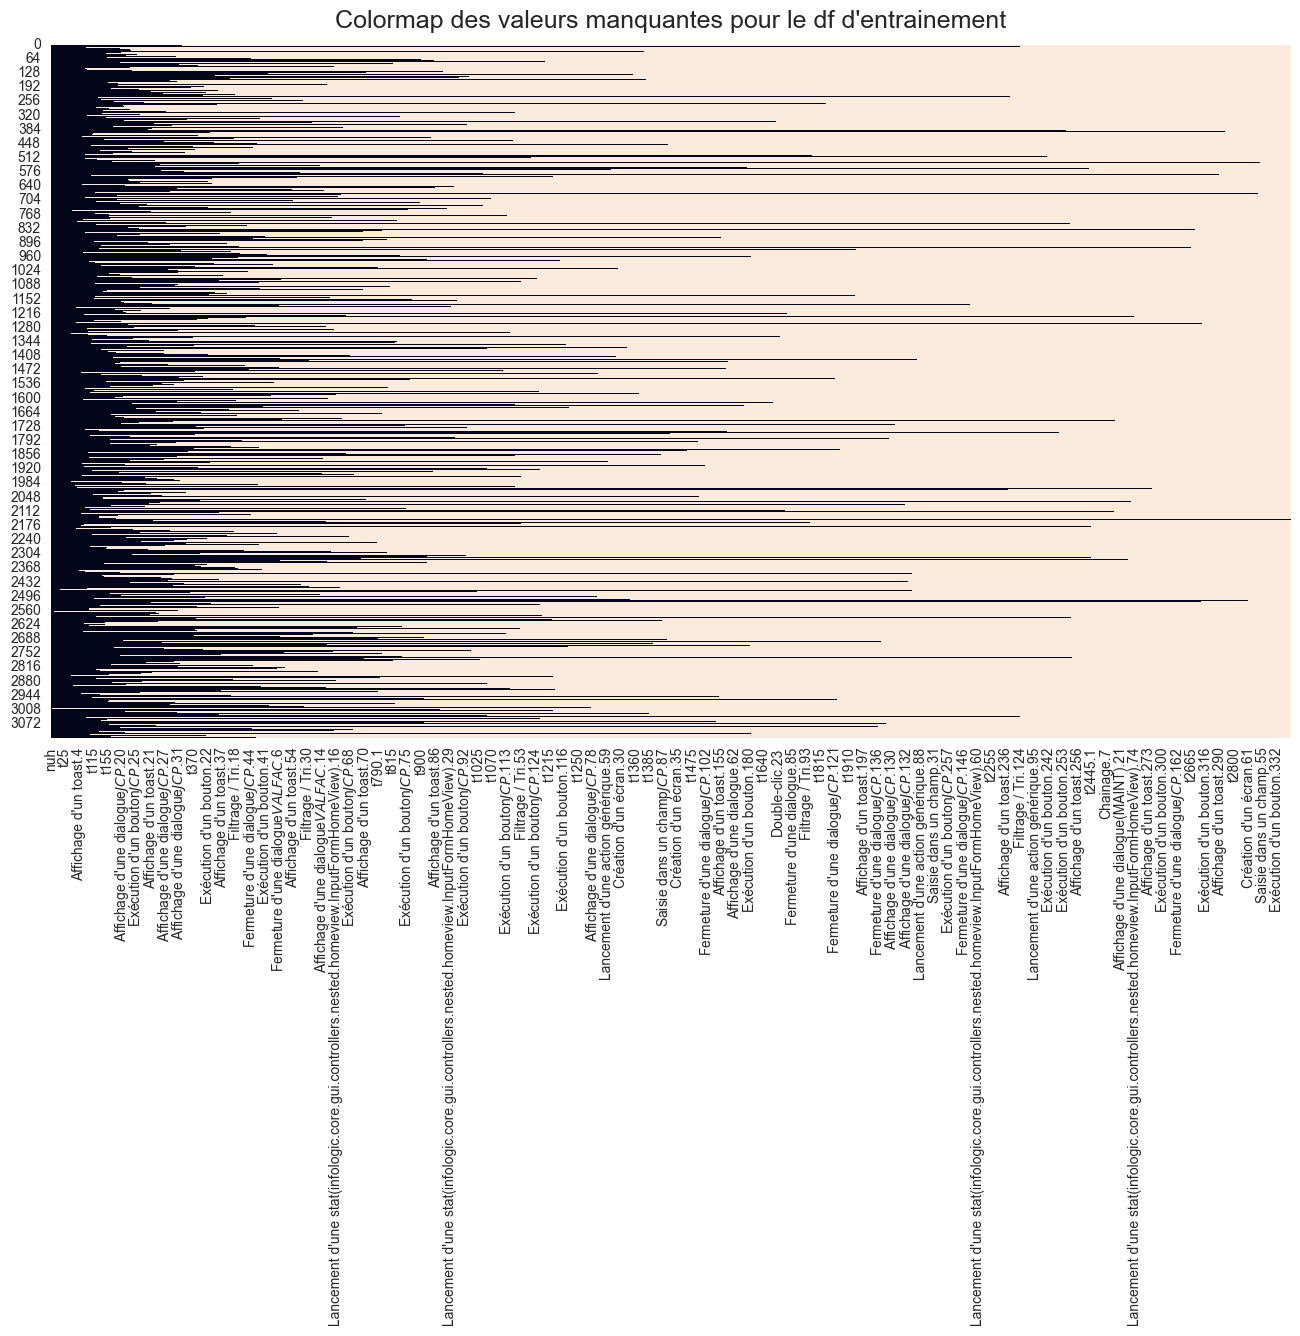

In [27]:
nan_colormap(df_train, 'Colormap des valeurs manquantes pour le df d\'entrainement')

# Après observation de la colormap, je pense que les solutions les plus pertinentes pour remplacer
# les valeurs manquantes sont soit de remplacer par des 0 et d'indiquer dans une colonne sous jacente que
# la valeure est originalement manquante, soit de remplacer par la moyenne et de ne rien indiquer. 

# Nouvelle stratégie : Comme on le voit dans la sortie précédente, il y a très peu de NaNs dans chacune 
# des colonnes. Je vais donc remplacer les NaNs par la médiane dans toutes les colonnes où il y a moins de 
# 20% de NaNs et ensuite utiliser une technique de prédiction.